# Sample Torque Curve

In [1]:
import os
import sys
projdir = os.path.abspath('../..')
if not projdir in sys.path:
    sys.path.insert(0,projdir)

In [2]:
from mmtime.utils import get_points, show_curve, fit_curve

In [4]:
datadir = os.path.join(projdir,'mmtime','data')

In [7]:
pullfile = os.path.join(datadir,'pull-force.csv')
releasefile = os.path.join(datadir,'release-force.csv')
pull_x, pull_y = get_points(pullfile)
release_x, release_y = get_points(releasefile)

In [18]:
import pint
u = pint.UnitRegistry()

q_x = release_x * 3721
q_y = release_y * 0.31


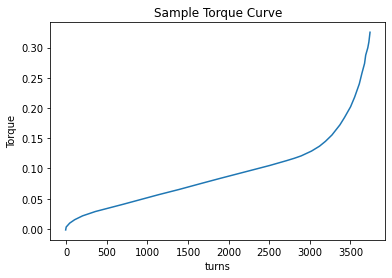

In [19]:
import matplotlib.pyplot as plt
def show_curve(x,y,title,xlabel,ylabel):
    plt.plot(x,y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
show_curve(q_x, q_y,"Sample Torque Curve", "turns","Torque")

In [22]:
from scipy import interpolate

def fit_curve(x, y): # using a cubic spline
    fit = interpolate.CubicSpline(x,y)
    return fit

In [23]:
n_sample = np.linspace(q_x[0], q_x[-1], 50)

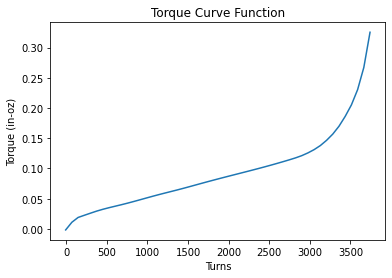

In [24]:
q_s = fit_curve(q_x, q_y)
q_sample = q_s(n_sample)
show_curve(n_sample, q_sample, 
           "Torque Curve Function", 
           "Turns", "Torque (in-oz)")

In [25]:
ni = n_sample
qi = q_sample

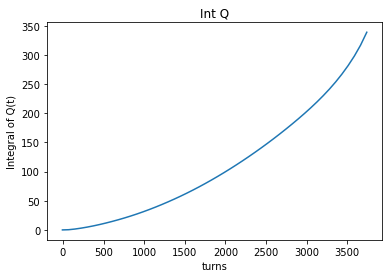

In [26]:
dn = ni[-1]/50
ai = [0]
for i in range(len(ni)-1):
    da = (qi[i+1] + qi[i])*dn/2
    ai.append(ai[i]+da)
show_curve(ni,ai,"Int Q", "turns", "Integral of Q(t)")

In [27]:
for i in range(len(ni)):
    if ai[i]> ai[-1]/2:
        print("Average Torque is",qi[i], " which happened at turn count:",ni[i])
        break

Average Torque is 0.11431239018672817  which happened at turn count: 2746.9633954641586
